In [25]:
import numpy as np
import pandas as pd
from sklearn.naive_bayes import GaussianNB
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import seaborn as sns
from sklearn.linear_model import Ridge

In [10]:
data = load_wine()
x = pd.DataFrame(data.data, columns=data.feature_names)
y = pd.Series(data.target,name='target')

In [16]:
print("shape:",x.shape)
print("shape:",y.shape)

shape: (178, 13)
shape: (178,)


In [13]:
print(x.head())
print(y.head())

   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  
0                  

In [18]:
y.unique()

array([0, 1, 2])

In [36]:
x_noise = x.copy()
x_noise = np.random.normal(0,1,x.shape) + x_noise

In [39]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=42)

In [40]:
model=GaussianNB()
model.fit(x_train,y_train)

,priors,None
,var_smoothing,1e-09


In [41]:
y_pred = model.predict(x_test)

In [31]:
print("confusion matrix:")
print(confusion_matrix(y_test,y_pred))
print("Classification report:")
print(classification_report(y_test,y_pred))
print('Accuracy score:')
print(accuracy_score(y_test,y_pred))

confusion matrix:
[[14  0  0]
 [ 0 14  0]
 [ 0  0  8]]
Classification report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        14
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00         8

    accuracy                           1.00        36
   macro avg       1.00      1.00      1.00        36
weighted avg       1.00      1.00      1.00        36

Accuracy score:
1.0


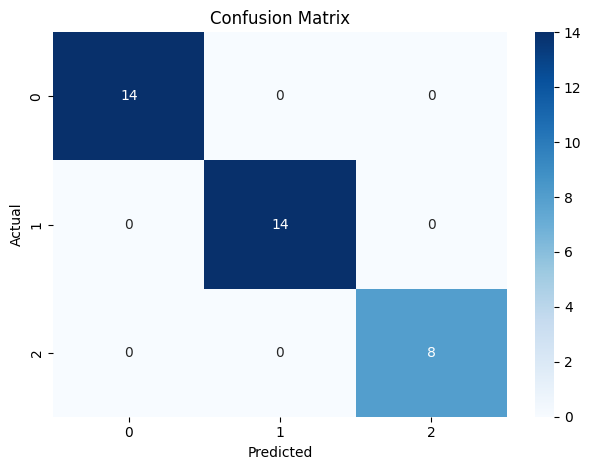

In [32]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='d',cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

C:\Users\agamb\AppData\Local\Temp\ipykernel_24112\578005117.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y, color='red', palette='Set1')


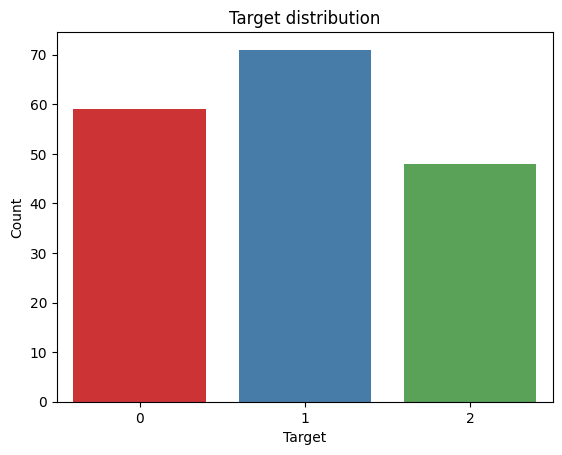

In [33]:
sns.countplot(x=y, color='red', palette='Set1')
plt.title('Target distribution')
plt.xlabel('Target')
plt.ylabel('Count')
plt.show()